    Draw Date    Winning Numbers  Multiplier
0  09/26/2020  11 21 27 36 62 24         3.0
1  09/30/2020  14 18 36 49 67 18         2.0
2  10/03/2020  18 31 36 43 47 20         2.0
3  10/07/2020  06 24 30 53 56 19         2.0
4  10/10/2020  05 18 23 40 50 18         3.0
5  10/14/2020  21 37 52 53 58 05         2.0
6  10/17/2020  06 10 31 37 44 23         2.0
7  10/21/2020  01 03 13 44 56 26         3.0
8  10/24/2020  18 20 27 45 65 06         2.0
9  10/28/2020  11 28 37 40 53 13         2.0
DATA CLEANING
Draw Date            0
Winning Numbers      0
Multiplier         210
dtype: int64
Number of rows: 1460
Number of rows after removing missing values (1460-210): 1250
Number of duplicates: 0

Display of the new dataframe after splitting the winning numbers into different columns
 and naming them <num1>..<num6>, the numbers show their positions.
     Draw Date    Winning Numbers  Multiplier num1 num2 num3 num4 num5 num6
0  09/26/2020  11 21 27 36 62 24         3.0   11   21   27   36   62 

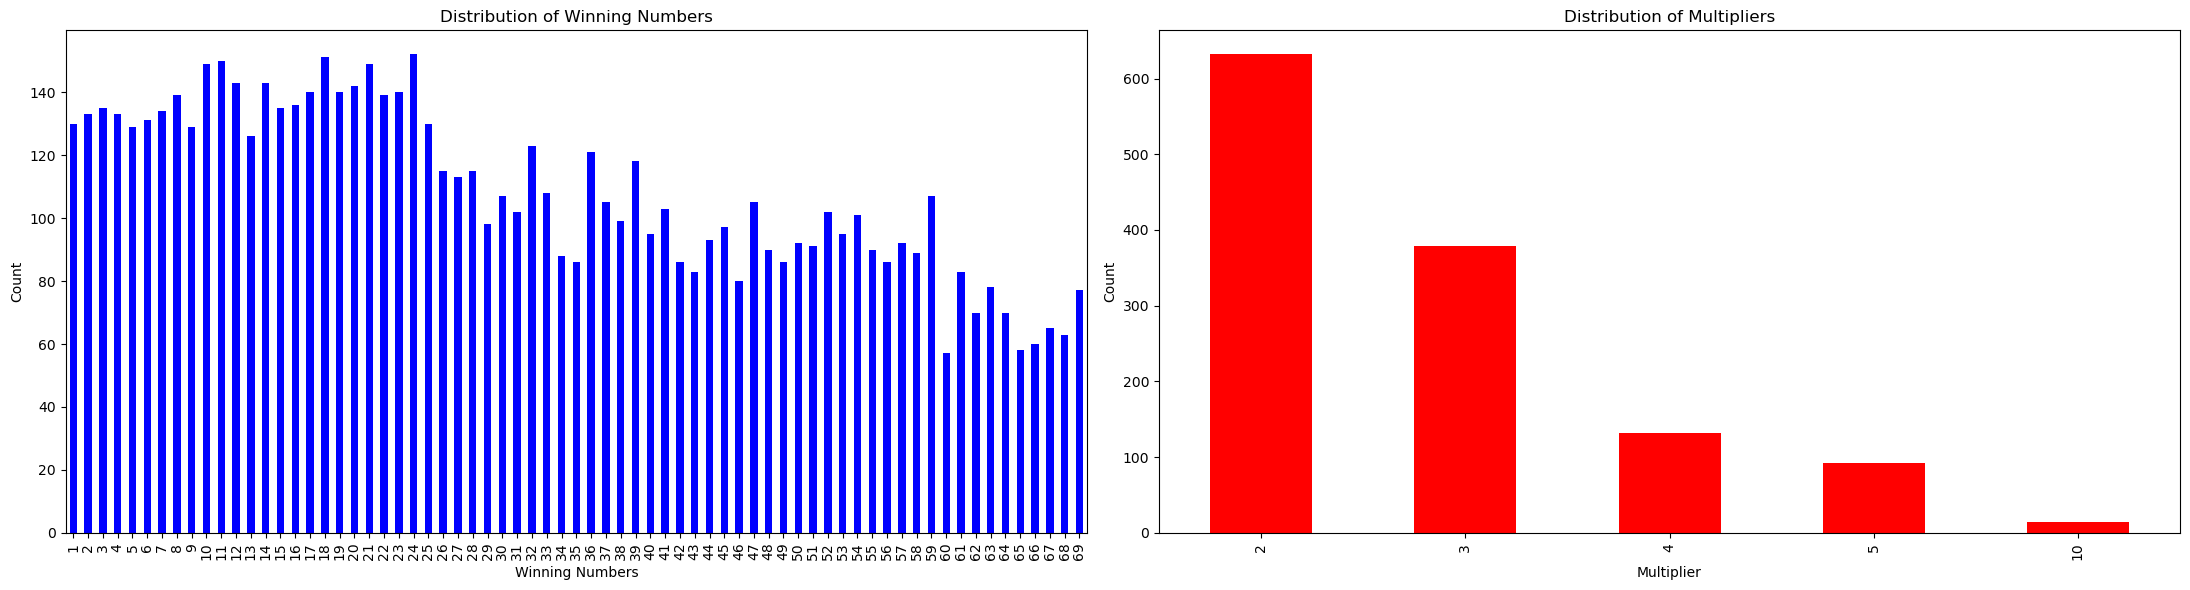

Question 2: Which is the most commonly drawn number? Which is the least commonly drawn number?
Most commonly drawn number: 24
Least commonly drawn number: 60

Question 3:
Is there any correlation between the winning numbers and the multiplier?
Correlation between 'num1' and 'Multiplier': -0.006
Correlation between 'num2' and 'Multiplier': -0.018
Correlation between 'num3' and 'Multiplier': -0.017
Correlation between 'num4' and 'Multiplier': -0.026
Correlation between 'num5' and 'Multiplier': -0.062
Correlation between 'num6' and 'Multiplier': 0.038


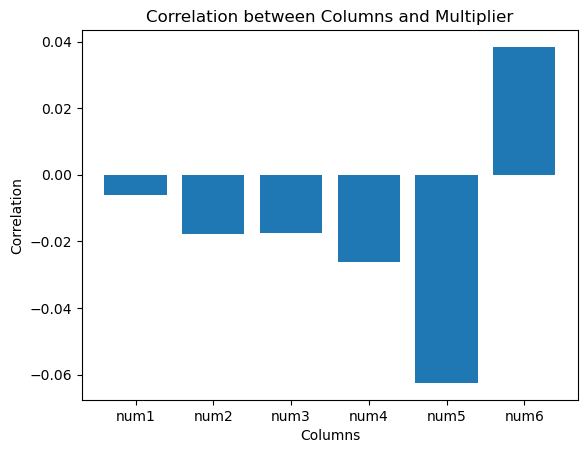


Question 4 
What are the top five most frequently drawn winning numbers for each position (1-6) in the Powerball lottery since 2010?



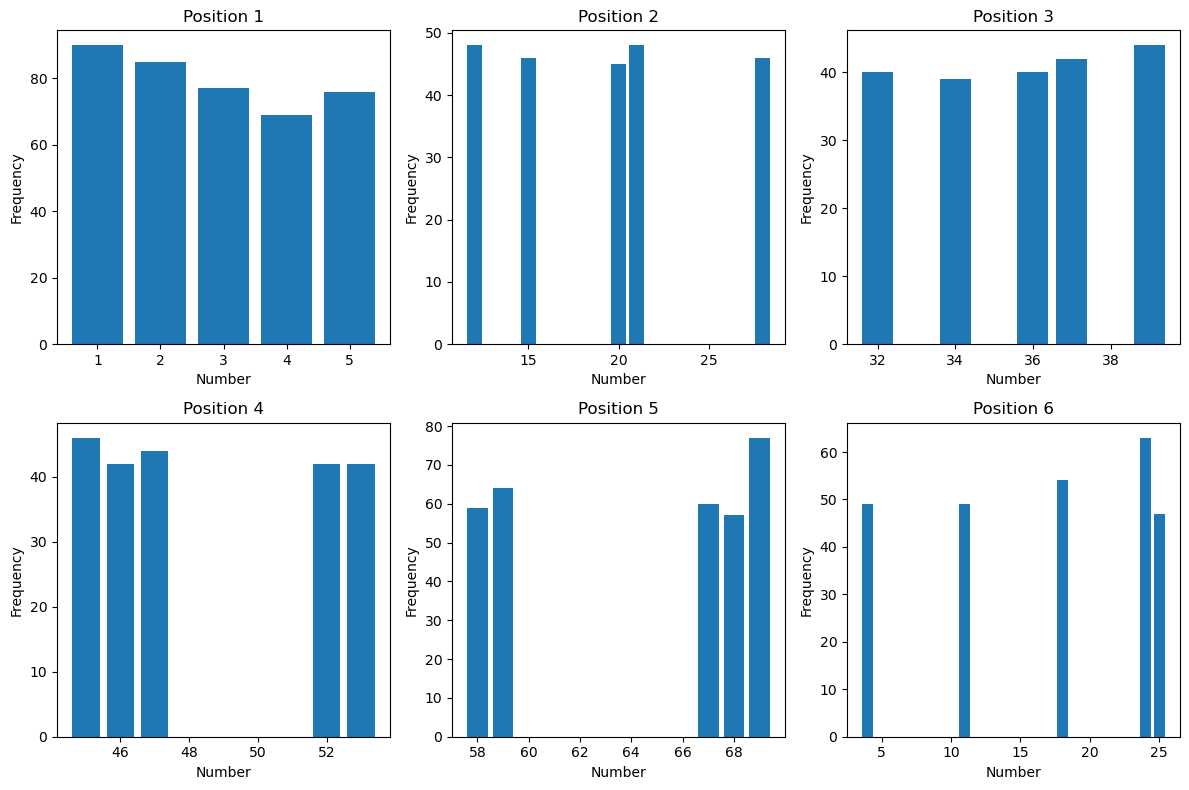

Most frequent numbers in num1: 1, 2, 3, 5, 4
Most frequent numbers in num2: 21, 12, 15, 28, 20
Most frequent numbers in num3: 39, 37, 36, 32, 34
Most frequent numbers in num4: 45, 47, 53, 46, 52
Most frequent numbers in num5: 69, 59, 67, 58, 68
Most frequent numbers in num6: 24, 18, 4, 11, 25
Question 5: Based on the historical data from the Powerball lottery, 
which series of numbers have the highest probability of appearing in the winning combination?
Series of numbers with the highest probability of appearing in the winning combination: ('11', '14', '18', '06', '05')
Question 6: Based on the historical data from the Powerball lottery, 
which series of numbers have the highest probability of appearing in the winning combination?
The estimated probability of winning from the first try is: 0.000100%
The estimated probability of winning after 1000000 (1 million )tries is: 63.212074%
The estimated probability of winning after 10000000 (TEN MILLION) tries is: 99.995460%


In [4]:

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import pandas as pd
import seaborn as sn
import seaborn as sns
from termcolor import colored


#importing the dataset from the following website: "https://data.ny.gov/api/views/d6yy-54nr/rows.xml?accessType=DOWNLOAD"
file_path = r"C:\Users\Administrateur\Downloads\Lottery_Powerball_Winning_Numbers__Beginning_2010.csv"
df = pd.read_csv(file_path)

# Display the first 10 rows
print(df.head(10))


# Print the sentence in blue
print(colored("DATA CLEANING", "blue"))


# Check for missing values
missing_values = df.isnull().sum()

# Print the count of missing values
print( missing_values)

# Count the number of rows
num_rows = df.shape[0]

# Print the number of rows
print("Number of rows:", num_rows)

# Create a new cleaned DataFrame without modifying the original DataFrame
new_df = df.dropna().copy()

# Count the number of rows in the cleaned DataFrame
num_rows_cleaned = new_df.shape[0]

# Print the number of rows after removing missing values
print(colored("Number of rows after removing missing values (1460-210):","green"), num_rows_cleaned)

# Check for duplicates
duplicates = new_df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the number of duplicates
print("Number of duplicates:", num_duplicates)




# Split the winning numbers column
new_df[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']] = new_df['Winning Numbers'].str.split(' ', expand=True)

# Display the updated DataFrame
print(colored("\nDisplay of the new dataframe after splitting the winning numbers into different columns\n and naming them <num1>..<num6>, the numbers show their positions.\n","green"),new_df.head(10))





# Check for missing values
missing_values = new_df.isnull().sum()
# Count the number of rows
num_rows = new_df.shape[0]
# Print the number of rows
print("Number of rows:", num_rows)

# Print the count of missing values
print(missing_values)
print(colored("\nNow we know there are no missing numbers amongst the winning numbers columns.\n","green"))

# Check data types of each column
column_types = new_df.dtypes

# Print the data types
print(column_types)

print(colored("Because the data types aren't all correct, we convert the Dates to date type and the winning numbers to integers. \n","green"))
# Convert the first column ('Draw Date') to datetime
new_df['Draw Date'] = pd.to_datetime(new_df['Draw Date'])
# Convert the rest of the columns to integers
columns_to_convert = ['Multiplier', 'num1', 'num2', 'num3', 'num4', 'num5', 'num6']
new_df[columns_to_convert] = new_df[columns_to_convert].astype(int)

# Check data types of each column after conversion
column_types = new_df.dtypes

# Print the updated data types
print(column_types)

print(colored("\nThe column types are now correct.\n"))




print(colored("DATA VISUALISATION + ANALYSIS + INTERPRETATION","blue"))
print(colored("Question 1: What is the distribution of winning numbers and multipliers?","red"))
print("The distribution of the winning numbers and the multipliers: \n")


print("The distribution of the winning numbers and the multipliers: \n")
# Define the column names for winning numbers (num1 to num6)
winning_numbers_columns = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6']

# Compute the distribution of winning numbers
winning_numbers_counts = new_df[winning_numbers_columns].stack().value_counts().sort_index()

# Plotting the distributions
plt.figure(figsize=(22, 6))

# Distribution of winning numbers
plt.subplot(1, 2, 1)
winning_numbers_counts.plot(kind='bar', color='blue')
plt.title("Distribution of Winning Numbers")
plt.xlabel("Winning Numbers")
plt.ylabel("Count")

# Compute the distribution of multipliers
multiplier_counts = new_df['Multiplier'].value_counts().sort_index()

# Distribution of multipliers
plt.subplot(1, 2, 2)
multiplier_counts.plot(kind='bar', color='red')
plt.title("Distribution of Multipliers")
plt.xlabel("Multiplier")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


# Question 2
print(colored("Question 2: Which is the most commonly drawn number? Which is the least commonly drawn number?","red"))
# Split the winning numbers column
new_df[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']] = new_df['Winning Numbers'].str.split(' ', expand=True)

# Concatenate all the winning numbers into a single column
all_numbers = pd.concat([new_df['num1'], new_df['num2'], new_df['num3'], new_df['num4'], new_df['num5'], new_df['num6']], ignore_index=True)

# Calculate the frequency of each number
number_counts = all_numbers.value_counts().sort_values(ascending=False)

# Get the most commonly drawn number
most_common_number = number_counts.index[0]

# Get the least commonly drawn number
least_common_number = number_counts.index[-1]

# Print the results
print("Most commonly drawn number:", most_common_number)
print("Least commonly drawn number:", least_common_number)

#Question 3
print(colored("\nQuestion 3:\nIs there any correlation between the winning numbers and the multiplier?","red"))
# Convert the last six columns to integer data type
columns_to_convert = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6']
new_df[columns_to_convert] = new_df[columns_to_convert].astype(int)

# Calculate the correlation between each column and 'Multiplier'
correlations = {}
for column in columns_to_convert:
    correlation = new_df['Multiplier'].corr(new_df[column])
    correlations[column] = correlation

# Print the correlations
for column, correlation in correlations.items():
    print(f"Correlation between '{column}' and 'Multiplier': {correlation:.3f}")

# Calculate the correlations
correlations = {}
for column in columns_to_convert:
    correlation = new_df['Multiplier'].corr(new_df[column])
    correlations[column] = correlation

# Plot the correlations
plt.bar(correlations.keys(), correlations.values())
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.title('Correlation between Columns and Multiplier')
plt.show()


#Question 4
print(colored("\nQuestion 4 \nWhat are the top five most frequently drawn winning numbers for each position (1-6) in the Powerball lottery since 2010?\n","red"))


# Get the value counts for each column
num1_counts = new_df['num1'].value_counts().head(5)
num2_counts = new_df['num2'].value_counts().head(5)
num3_counts = new_df['num3'].value_counts().head(5)
num4_counts = new_df['num4'].value_counts().head(5)
num5_counts = new_df['num5'].value_counts().head(5)
num6_counts = new_df['num6'].value_counts().head(5)

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.bar(num1_counts.index, num1_counts.values)
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Position 1')

plt.subplot(232)
plt.bar(num2_counts.index, num2_counts.values)
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Position 2')

plt.subplot(233)
plt.bar(num3_counts.index, num3_counts.values)
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Position 3')

plt.subplot(234)
plt.bar(num4_counts.index, num4_counts.values)
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Position 4')

plt.subplot(235)
plt.bar(num5_counts.index, num5_counts.values)
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Position 5')

plt.subplot(236)
plt.bar(num6_counts.index, num6_counts.values)
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Position 6')

plt.tight_layout()
plt.show()


# Combine the counts into a dictionary
frequent_numbers = {
    'num1': num1_counts.index.tolist(),
    'num2': num2_counts.index.tolist(),
    'num3': num3_counts.index.tolist(),
    'num4': num4_counts.index.tolist(),
    'num5': num5_counts.index.tolist(),
    'num6': num6_counts.index.tolist()
}

# Print the results
for col, numbers in frequent_numbers.items():
    print(f"Most frequent numbers in {col}: {', '.join(map(str, numbers))}")

#Question 5
print(colored("Question 5: Based on the historical data from the Powerball lottery, \nwhich series of numbers have the highest probability of appearing in the winning combination?","red"))


# Split the winning numbers column
new_df[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']] = new_df['Winning Numbers'].str.split(' ', expand=True)

# Concatenate all the winning numbers into a single series
all_numbers = pd.concat([new_df['num1'], new_df['num2'], new_df['num3'], new_df['num4'], new_df['num5'], new_df['num6']], ignore_index=True)

# Calculate the frequency of each series of numbers
series_counts = all_numbers.groupby(all_numbers.index // 5).apply(tuple).value_counts().sort_values(ascending=False)

# Get the series with the highest probability
highest_probability_series = series_counts.index[0]

# Print the series with the highest probability
print("Series of numbers with the highest probability of appearing in the winning combination:", highest_probability_series)




#Question 6
print(colored("Question 6: Based on the historical data from the Powerball lottery, \nwhich series of numbers have the highest probability of appearing in the winning combination?","red"))
def calculate_probability_of_winning(tries, odds):
    probability_of_not_winning = (1 - (1 / odds)) ** tries
    probability_of_winning = 1 - probability_of_not_winning
    return probability_of_winning

number_of_tries00 = 1
odds_of_winning = 1000000

probability = calculate_probability_of_winning(number_of_tries00, odds_of_winning)
print(f"The estimated probability of winning from the first try is: {probability * 100:.6f}%")


number_of_tries01 = 1000000
odds_of_winning = 1000000

probability = calculate_probability_of_winning(number_of_tries01, odds_of_winning)
print(f"The estimated probability of winning after {number_of_tries01} (1 million )tries is: {probability * 100:.6f}%")

number_of_tries02 = 10000000
odds_of_winning = 1000000

probability02 = calculate_probability_of_winning(number_of_tries02, odds_of_winning)
print(f"The estimated probability of winning after {number_of_tries02} (TEN MILLION) tries is: {probability02 * 100:.6f}%")








